In [756]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [757]:
df_fi = pd.read_csv('fields.csv', encoding='1251', sep=';', decimal=',')
df_fi.head()

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph
0,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,ЭС,Покупные,минимальная,3.8,243.16,226.93,4.46,5.78
1,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,NaN,NaN,минимальная,NaN,243.16,226.93,4.46,5.78
2,22.47.01.002.00,Алтай,пашня,4.0,2023,Пар,Яр.пшеница мягкая,NaN,485.79,NaN,NaN,NaN,NaN,NaN,219.78,204.60,3.85,5.72
3,22.47.01.003.00,Алтай,пашня,4.0,2023,Оз.пшеница мягкая,Пар,NaN,452.25,Скипетр,ЭС,Покупные,минимальная,3.8,205.15,192.28,6.49,5.94
4,22.47.01.004.00,Алтай,пашня,3.0,2023,Оз.пшеница мягкая,Пар,NaN,269.64,Скипетр,ЭС,Покупные,минимальная,3.8,183.26,162.69,6.16,5.94


In [758]:
df_fi['season'].value_counts()

season
2024    8145
2023    7909
Name: count, dtype: int64

Данных по обоим годам достаточно для анализа

Добавим тип почвы

In [759]:
dict_reg = {
    "Алтай": 'Черноземы', #Черноземы выщелоченные
    "Курск": 'Черноземы', #Черноземы типичные
    "Калуга": 'Дерново-подзолистые',
    "Тюмень": 'Дерново-подзолистые',
    "Рязань": 'Серые лесные',
    "СПб": 'Торфяно- и торфянисто-подзолисто-глеевые',
    "Башкирия": 'Серые лесные',
    "Татарстан": 'Серые лесные',
    "Оренбург": 'Черноземы', #Черноземы южные
    "Самара": 'Черноземы', #Черноземы обыкновенные
    "Новосибирск": 'Черноземы', #Черноземы выщелоченные
    "Москва": 'Дерново-подзолистые',
    "Воронеж": 'Черноземы' #Черноземы выщелоченные/типичные
}
df_fi['soil'] = df_fi['region'].map(dict_reg)

In [760]:
df_fi[df_fi['region'] == 'Башкирия']

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph,soil
4003,02.09.02.002.01,Башкирия,пашня,4.0,2023,Подсолнечник,Чечевица,NaN,120.25,Смесь сортов,РС-1,Покупные,классическая с плугом,1.98,0.0,0.0,0.0,0.0,Серые лесные
4004,02.09.02.002.02,Башкирия,пашня,4.0,2023,"Залежь, лес",Залежь,NaN,49.70,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Серые лесные
4005,02.09.02.003.00,Башкирия,пашня,4.0,2023,Пар,Залежь,NaN,91.78,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Серые лесные
4006,02.09.02.004.00,Башкирия,пашня,4.0,2023,"Залежь, кустарник","Залежь, кустарник",NaN,39.21,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Серые лесные
4007,02.09.02.005.00,Башкирия,пашня,4.0,2023,"Залежь, лес","Залежь, лес",NaN,186.24,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Серые лесные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12359,02.23.11.059.00,Башкирия,пашня,2.0,2024,Люцерна пр.лет корм,Люцерна пр.лет корм,3.0,312.29,Сарга,РС-1,Свои,классическая с плугом,4.00,0.0,0.0,0.0,0.0,Серые лесные
12360,02.23.11.060.00,Башкирия,пашня,2.0,2024,Кукуруза силос,Кукуруза силос,NaN,5.30,Дорка,F1,Покупные,классическая с плугом,6.70,0.0,0.0,0.0,0.0,Серые лесные
12361,02.23.11.061.00,Башкирия,пашня,2.0,2024,Кукуруза силос,Кукуруза силос,NaN,120.68,Галифакс,F1,Покупные,минимальная,6.70,0.0,0.0,0.0,0.0,Серые лесные
12362,02.23.11.062.00,Башкирия,пашня,NaN,2024,Подсолнечник,Пар,NaN,5.22,Сурус,F1,Покупные,минимальная,2.20,0.0,0.0,0.0,0.0,Серые лесные


Все микроэлементы по нулям => мы ничего не можем с этим сделать (это 100% ошибка), значит, дропаем, по Башкирии данных немного

In [761]:
df_fi = df_fi[df_fi['region'] != 'Башкирия']

_______

Обработаем гумус

In [762]:
df_fi['humus'].describe()

count    15573.000000
mean        40.487465
std         90.520668
min          0.000000
25%          0.000000
50%          5.490000
75%         35.660000
max       1313.870000
Name: humus, dtype: float64

Гумус в процентном соотношении должен быть => больше 100 не может быть

In [763]:
df_fi['humus'] = df_fi['humus'].apply(lambda x: x if x <= 100 else np.nan)
print(df_fi['humus'].isna().sum())
df_fi['humus'].describe()

2171


count    13402.000000
mean        12.250384
std         22.323627
min          0.000000
25%          0.000000
50%          3.870000
75%          7.480000
max        100.000000
Name: humus, dtype: float64

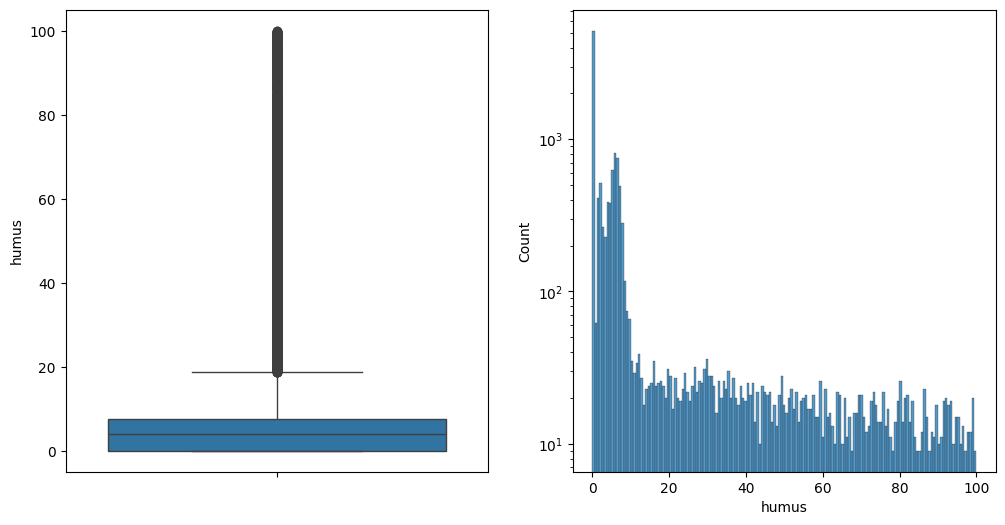

In [764]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(df_fi['humus'], ax=ax[0])
sns.histplot(df_fi['humus'], ax=ax[1])
plt.yscale('log')

______

In [765]:
dfw = pd.read_csv('works.csv', sep=';', encoding='1251')
df_fi['key'] = df_fi.apply(lambda x: (x.season, x.field), axis=1)
dfw['key'] = dfw.apply(lambda x: (x.season, x.field), axis=1)

In [766]:
print(len(dfw.key.unique()), len(df_fi.key.unique()))

12327 15573


Все еще разное количество ключей(

______

Для того, чтобы было достаточное количество данных для будущих анализов и тестов, мы возьмем только самые популярные регионы

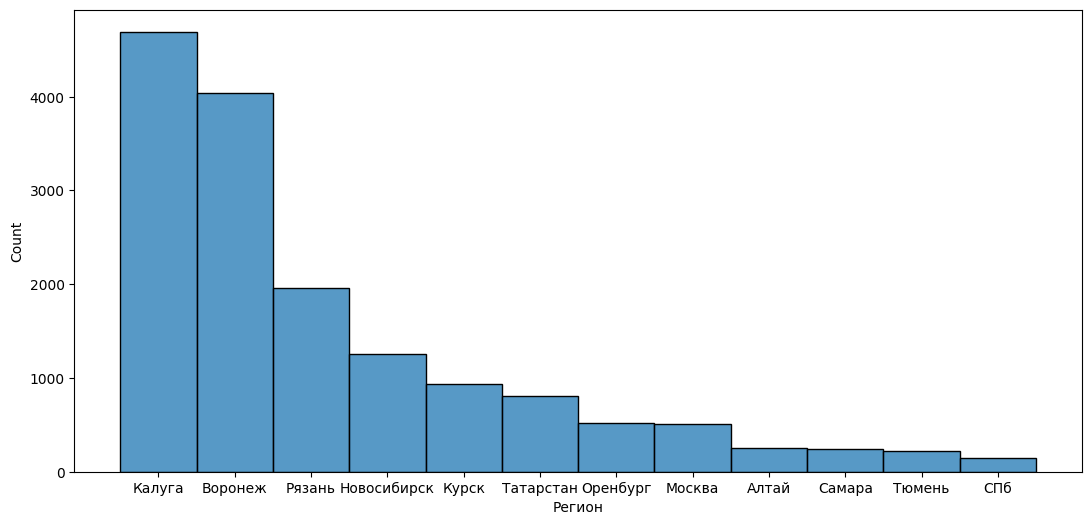

region
Калуга         4694
Воронеж        4037
Рязань         1963
Новосибирск    1250
Курск           934
Татарстан       805
Оренбург        524
Москва          504
Алтай           254
Самара          241
Тюмень          218
СПб             149
Name: count, dtype: int64


In [767]:
dt = df_fi['region'].value_counts()
dtt = []
for reg in dt.keys():
    dtt.extend([reg] * dt[reg])
df_v = pd.DataFrame({'Регион': dtt})
f, ax = plt.subplots(1, 1, figsize=(13, 6))
sns.histplot(df_v['Регион'])
plt.show()
print(dt)

Возьмем первые 6 регионов, они явно преобладают к количестве над остальными

In [768]:
df_fi['region'] = df_fi['region'].apply(lambda x:x if dt[x] >= dt['Татарстан'] else np.nan)
df_fi = df_fi.dropna(subset=['region'])
df_fi

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph,soil,key
126,46.11.01.001.00,Курск,пашня,3.0,2023,Соя,Яр.пшеница твёрдая,NaN,123.77,ГЛ Мелани,NaN,NaN,NaN,2.09,105.60,188.10,6.05,5.72,Черноземы,"(2023, 46.11.01.001.00)"
127,46.11.01.002.00,Курск,пашня,4.0,2023,Пар,Яр.пшеница твёрдая,NaN,192.00,NaN,NaN,NaN,NaN,NaN,61.60,143.00,6.60,5.28,Черноземы,"(2023, 46.11.01.002.00)"
128,46.11.01.003.00,Курск,пашня,3.0,2023,Яр.ячмень,Горох,NaN,8.18,Грэйс,NaN,NaN,NaN,5.18,0.00,0.00,0.00,0.00,Черноземы,"(2023, 46.11.01.003.00)"
129,46.22.01.001.01,Курск,пашня,4.0,2023,Соя,Яр.пшеница мягкая,NaN,55.07,ОАК Пруденс,NaN,NaN,NaN,2.09,103.57,93.92,5.69,5.40,Черноземы,"(2023, 46.22.01.001.01)"
130,46.22.01.001.02,Курск,пашня,4.0,2023,Соя,Яр.пшеница мягкая,NaN,194.75,ОАК Пруденс,NaN,NaN,NaN,2.09,103.57,93.92,5.69,5.40,Черноземы,"(2023, 46.22.01.001.02)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16049,36.29.07.042.00,Воронеж,пашня,4.0,2024,Яр.пшеница мягкая,Сах.свекла,NaN,70.48,Ликамеро,РС-2,Покупные,минимальная,5.00,6.05,89.10,77.53,4.95,Черноземы,"(2024, 36.29.07.042.00)"
16050,36.29.07.043.00,Воронеж,пашня,4.0,2024,Соя,Соя,NaN,115.70,Султана,РСт,Покупные,минимальная,2.10,5.94,148.50,NaN,4.18,Черноземы,"(2024, 36.29.07.043.00)"
16051,36.29.07.044.00,Воронеж,пашня,3.0,2024,Соя,Соя,NaN,114.65,Султана,РСт,Покупные,минимальная,2.10,5.94,81.40,NaN,4.84,Черноземы,"(2024, 36.29.07.044.00)"
16052,36.29.07.045.00,Воронеж,пашня,4.0,2024,Кукуруза зерно,Соя,NaN,18.34,Жаклин,F1,Покупные,минимальная,6.50,5.83,130.90,20.17,4.62,Черноземы,"(2024, 36.29.07.045.00)"


____________

Закончили с удалением данных

Заполним наши NaN в гумусе

In [769]:
# Группируем данные и рассчитываем медиану по 'humus'
hum_med = df_fi.groupby(['soil', 'region'])['humus'].median()
# Заполняем пропуски в 'humus'
df_f = df_fi.copy() # для поиска корреляций без лишних медианных значений
df_fi['humus'] = df_fi['humus'].fillna(
    df_fi.apply(lambda x: hum_med.get((x['soil'], x['region'])), axis=1)
)
# проверим на наличие nan после заполнения, вдруг ошибка какая была
for col in df_fi.columns: 
    if df_fi[col].isna().any(axis=0):
        print(f'{col}: {df_fi[col].isna().sum()}')

fertility_score: 628
crop_predecessor: 267
crop_yearold: 11499
hybrid: 6467
reproduction: 6889
seed_origin: 6723
technology: 6366
yield_plan: 4617


Нерепрезентативно мало данных для cropyearold => дропаем

In [770]:
#df_f = df_f.drop(columns='crop_yearold')

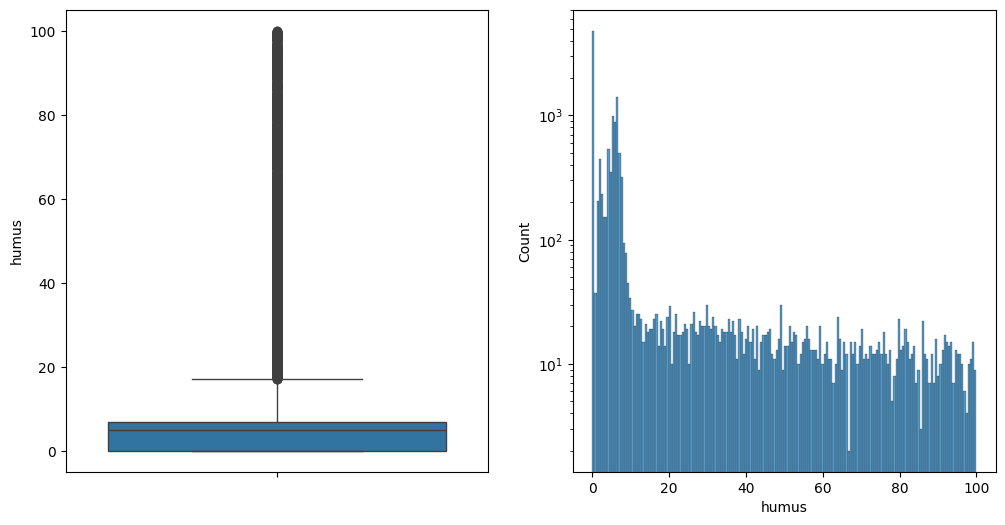

In [771]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(df_fi['humus'], ax=ax[0])
sns.histplot(df_fi['humus'], ax=ax[1])
plt.yscale('log')

In [772]:
df_fi['humus'].describe()

count    13683.000000
mean        11.307998
std         20.931795
min          0.000000
25%          0.000000
50%          5.010000
75%          6.820000
max        100.000000
Name: humus, dtype: float64

Посмотрим NaNы

In [773]:
df_f.drop(columns='fertility_score').corr(numeric_only=1)

,season,crop_yearold,area,yield_plan,p2o5,k2o,humus,ph
season,1.000000,-0.081670,-0.001206,0.011948,-0.569286,-0.065761,0.456607,-0.121300
crop_yearold,-0.081670,1.000000,0.004920,0.186566,0.134875,0.094383,-0.033058,0.133706
area,-0.001206,0.004920,1.000000,-0.017054,0.147471,0.232300,0.002808,0.208148
yield_plan,0.011948,0.186566,-0.017054,1.000000,-0.012643,-0.004318,0.032704,0.045135
p2o5,-0.569286,0.134875,0.147471,-0.012643,1.000000,0.491816,-0.175863,0.500777
k2o,-0.065761,0.094383,0.232300,-0.004318,0.491816,1.000000,0.272183,0.702926
humus,0.456607,-0.033058,0.002808,0.032704,-0.175863,0.272183,1.000000,0.316575
ph,-0.121300,0.133706,0.208148,0.045135,0.500777,0.702926,0.316575,1.000000


Пусть будет количественная для нашего вопроса, смлишком мало данных с большими годами (потом попробовать объединить до "менее 5 лет" и "5 и более лет" и найти корреляции)
Дропнули, тк одни наны в корреляциях

Посмотрим их взаимосвязи с другими характеристиками для решения по их изменению

In [774]:
def corr_cat(x, y): # функция для подсчета корреляции для 2х категориальных переменных
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ( (r-1)**2 / (n-1) )
    kcorr = k - ( (k-1)**2 / (n-1) )
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))) 

'''
def coor_cat_num(numeric, categor): # функция для подсчета корреляции для категор/номинал
    df = df_f[[numeric, categor]].dropna()
    mezhgroup = vnutrigroup = 0
    meann = df[numeric].mean()
    for znach in set(df[categor].dropna()):
        data = pd.Series(df[df[categor] == znach][numeric]).dropna()
        vnutrigroup += sum([(elem - data.mean()) ** 2 for elem in data])
        mezhgroup += data.fillna(0).shape[0] * (pd.Series([data.mean()]).fillna(0)[0] - meann) ** 2
        print(znach)
    return (mezhgroup / (mezhgroup + vnutrigroup)) ** 0.5
    '''
def coor_cat_num(df, numeric, categor): 
    mezhgroup = vnutrigroup = 0
    meann = df[numeric].mean()
    unique_categories = df[categor].dropna().unique()
    for znach in unique_categories:
        data = df[df[categor] == znach][numeric].dropna()  # Фильтрация и удаление NaN для каждой категории
        if data.empty:
            continue  # Пропускаем категории без данных
        # Внутригрупповая дисперсия
        vnutrigroup += ((data - data.mean()) ** 2).sum()
        # Межгрупповая дисперсия
        mezhgroup += len(data) * (data.mean() - meann) ** 2
    return (mezhgroup / (mezhgroup + vnutrigroup)) ** 0.5

Выведем значимые корреляции номинальных с категориальными

In [775]:
for cat in ['fertility_score', 'crop_predecessor', "hybrid", "reproduction", "seed_origin", "technology"]:
    print(cat + ":")
    for num in ['crop_yearold', 'area', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph']:
        if coor_cat_num(df_f[[num, cat]].dropna(), num, cat) > 0.3: # чтобы коркоэф имел хотя бы умеренное влияние
            print(f'{num}: {round(coor_cat_num(df_f[[num, cat]].dropna(), num, cat), 3)}', end='\t')
    for categ in ['soil', 'region', 'land_type', 'season','crop']:
        if corr_cat(df_f[cat], df_f[categ]) > 0.3:
            print(f'{categ}: {round(corr_cat(df_f[cat], df_f[categ]), 3)}', end='\t')
    print()

fertility_score:
k2o: 0.471	ph: 0.545	soil: 0.414	region: 0.331	crop: 0.419	
crop_predecessor:
crop_yearold: 0.789	area: 0.406	p2o5: 0.378	k2o: 0.545	humus: 0.341	ph: 0.663	soil: 0.53	region: 0.489	land_type: 0.968	crop: 0.538	
hybrid:
crop_yearold: 0.594	area: 0.396	yield_plan: 0.946	p2o5: 0.442	k2o: 0.378	humus: 0.453	ph: 0.485	soil: 0.653	region: 0.644	season: 0.484	crop: 0.639	
reproduction:
crop_yearold: 0.346	yield_plan: 0.403	region: 0.34	crop: 0.459	
seed_origin:
crop: 0.644	
technology:
ph: 0.415	soil: 0.59	region: 0.524	crop: 0.358	


С очень большой вероятностью мы правильно подставим данные в crop_predecessor по land_type

In [776]:
def fill_with_mode(group):
    mode_val = group.mode()
    return mode_val[0] if not mode_val.empty else np.nan

# Заполнение NaN в колонке crop_predecessor на основе land_type
df_fi['crop_predecessor'] = df_fi.groupby('land_type')['crop_predecessor'].transform(fill_with_mode)

Мы можем попробовать предугадать категорию hybrid из совокупности crop, region (или soil, их коркоэф почти равен 1, без разницы) и crop_yearold

In [777]:
most_common = df_fi.groupby(['crop', 'soil'])['hybrid'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_fi['hybrid'] = df_fi['hybrid'].fillna(
    df_fi.apply(lambda x: most_common.get((x['crop'], x['soil'])), axis=1)
) # при понижении шага с crop_yearold появлялась ошибка OSError: could not get source code, от которой не удалось избавиться, так что перешел на менее точную версию

In [778]:
most_common = df_fi.groupby(['region', 'soil'])['hybrid'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_fi['hybrid'] = df_fi['hybrid'].fillna(
    df_fi.apply(lambda x: most_common.get((x['region'], x['soil'])), axis=1)
)

In [779]:
print(f'hybrid: {df_fi["hybrid"].isna().sum()}')

hybrid: 0


Далее seed_origin по crop

In [780]:
most_common = df_fi.groupby("crop")['seed_origin'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_fi['seed_origin'] = df_fi['seed_origin'].fillna(
    df_fi.apply(lambda x: most_common.get(x['crop']), axis=1)
)
print(f'seed_origin: {df_fi["seed_origin"].isna().sum()}')

seed_origin: 473


Тк он больше ни с кем нормально не коррелирует, то дропаем эти NaNы

In [781]:
df_fi = df_fi.dropna(subset='seed_origin')

Теперь technology

In [782]:
corr_cat(df_f['hybrid'], df_f["technology"]) # просто проверю

0.5258491042684128

In [784]:
most_common = df_fi.groupby(['crop', 'region', 'soil'])['technology'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_fi['technology'] = df_fi['technology'].fillna(
    df_fi.apply(lambda x: most_common.get((x['crop'], x['soil'])), axis=1)
)

C:\Users\yaros\AppData\Local\Temp\ipykernel_3208\2004741828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fi['technology'] = df_fi['technology'].fillna(


In [799]:
print(f'technology: {df_fi["technology"].isna().sum()}')

technology: 0


In [ ]:
most_common = df_fi.groupby(['crop', 'soil'])['technology'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_fi['technology'] = df_fi['technology'].fillna(
    df_fi.apply(lambda x: most_common.get((x['crop'], x['soil'])), axis=1)
)
most_common = df_fi.groupby(['region', 'crop'])['technology'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_fi['technology'] = df_fi['technology'].fillna(
    df_fi.apply(lambda x: most_common.get((x['region'], x['crop'])), axis=1)
)
most_common = df_fi.groupby(['hybrid', 'region'])['technology'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_fi['technology'] = df_fi['technology'].fillna(
    df_fi.apply(lambda x: most_common.get((x['hybrid'], x['region'])), axis=1)
)

C:\Users\yaros\AppData\Local\Temp\ipykernel_3208\3642757061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fi['technology'] = df_fi['technology'].fillna(
C:\Users\yaros\AppData\Local\Temp\ipykernel_3208\3642757061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fi['technology'] = df_fi['technology'].fillna(
C:\Users\yaros\AppData\Local\Temp\ipykernel_3208\3642757061.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [1]:
df_fi['yeald_plan_full'] = df_fi.apply(lambda x: x.area * x.yeald_plan, axis=1)
df_fi['yeald_plan_full'] = df_fi['yeald_plan_full'].apply(lambda x: 0.25 if x < df_fi['yeald_plan_full'].quantile(0.25)
                                                          else 0.5 if x < df_fi['yeald_plan_full'].quantile(0.5)
                                                          else 0.75 if x < df_fi['yeald_plan_full'].quantile(0.75)
                                                          else 1)


NameError: name 'df_fi' is not defined